In [2]:
from torchvision import datasets, transforms

In [3]:
train_dataset = datasets.MNIST(root='./num/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)
test_dataset = datasets.MNIST(root='./num/',
                              train=False,
                              transform=transforms.ToTensor(),
                              download=True)

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader

In [5]:
batch_size = 64
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

In [6]:
import torchvision

In [7]:
images, labels = next(iter(train_loader))
img = torchvision.utils.make_grid(images)

img = img.numpy().transpose(1, 2, 0)
std = [0.5, 0.5, 0.5]
mean = [0.5, 0.5, 0.5]
img = img * std + mean

In [10]:
img.mean(), img.max(), img.min()

(0.5581625804743465, 1.0, 0.5)

In [7]:
import matplotlib.pyplot as plt 
%matplotlib inline

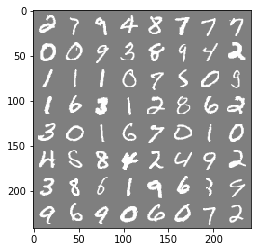

In [8]:
plt.imshow(img)

In [9]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Sequential(nn.Conv2d(1, 6, 3, 1, 2), nn.ReLU(),
                                   nn.MaxPool2d(2, 2))

        self.conv2 = nn.Sequential(nn.Conv2d(6, 16, 5), nn.ReLU(),
                                   nn.MaxPool2d(2, 2))

        self.fc1 = nn.Sequential(nn.Linear(16 * 5 * 5, 120),
                                 nn.BatchNorm1d(120), nn.ReLU())

        self.fc2 = nn.Sequential(
            nn.Linear(120, 84),
            nn.BatchNorm1d(84),
            nn.ReLU(),
            nn.Linear(84, 10))

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size()[0], -1)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

In [11]:
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
batch_size = 64
LR = 0.001

net = LeNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(
    net.parameters(),
    lr=LR,
)

epoch = 1

In [13]:
for epo in range(epoch):
    sum_loss = 0.0
    for i, data in enumerate(train_loader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()  
        outputs = net(inputs)  
        loss = criterion(outputs, labels)  
        loss.backward() 
        optimizer.step()

        # print(loss)
        sum_loss += loss.item()
        if i % 100 == 99:
            print('[%d,%d] loss:%.03f' %
                  (epo + 1, i + 1, sum_loss / 100))
            sum_loss = 0.0

[1,100] loss:0.693
[1,200] loss:0.208
[1,300] loss:0.132
[1,400] loss:0.106
[1,500] loss:0.089
[1,600] loss:0.086
[1,700] loss:0.073
[1,800] loss:0.087
[1,900] loss:0.064


In [20]:
net.eval()  
correct = 0
total = 0
for data_test in test_loader:
    images, labels = data_test
    images, labels = images.cuda(), labels.cuda()
    output_test = net(images)
    _, predicted = torch.max(output_test, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print("correct1: ", correct)
print("Test acc: {0}".format(correct.item() /
                             len(test_dataset)))

correct1:  tensor(9755, device='cuda:0')
Test acc: 0.9755


In [21]:
torch.save(net.state_dict(), "saved_models/lenet.pth")

In [ ]:
# shift + tab